# The normal distribution, the *t*-distribution and confidence intervals
## Introduction to the normal distribution
For many biological variables the distribution is symmetrical around the mean $\mu$, and about 95 % of the observations lie withing two standard deviations $\sigma$ of the mean. The common occurence of such distributions has led to the importance of the theoretical curve which describes them, called the **normal distributions**. Although data are not always perfectly distributed this way, many are close enough to normality for important information to be obtained based on the properties of the normal distribution.

The **probability density function** of the normal distribution has the following formula : $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

* the curve is symmetrical about the mean and steepest at one standard deviation from the mean.
* 95 % of the population is within 1.96 standard deviation from the mean, hence 2.5 % of the population have values higher (or lower) than 1.96 standard deviations from the mean.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from math import sqrt, pi, ceil
from scipy.stats import norm, t, probplot, shapiro
from scipy.special import erf, erfinv

In [2]:
def norm_pdf(x, mu=0, sigma=1):
    """Return the probability density function result for x, by default for the standard normal distribution"""
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

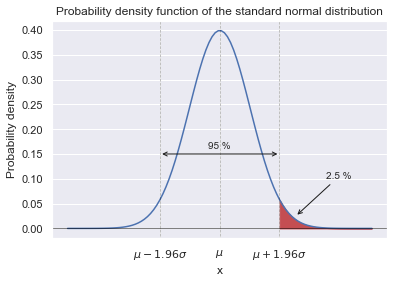

In [3]:
#define plotting values
x = np.linspace(-5, 5, 100)
y = norm_pdf(x)

#could also use scipy.stats.norm
#norm.pdf(x)

#draw plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Probability density")
ax.set_xlabel("x")

#fill curve area corresponding to top 2.5 % of the population
ax.fill_between(x, 0, y, where=x>1.96, color="C3")
ax.annotate('2.5 %', xy=(2.5, 0.025), xytext=(3.5, 0.1),
            arrowprops=dict(arrowstyle="->", color="k"))

#set x ticks and labels for useful values and draw vertical lines
ax.set_xticks([-1.96, 0, 1.96])
ax.set_xticklabels(["$\mu-1.96\sigma$", "$\mu$", "$\mu+1.96\sigma$"])
ax.axhline(y=0, color="black", lw=.5)
ax.axvline(x=-1.96, color="black", lw=.5, ls=":")
ax.axvline(x=0, color="black", lw=.5, ls=":")
ax.axvline(x=1.96, color="black", lw=.5, ls=":")

#emphasized interval containing 95 % of data
ax.annotate("", xy=(-1.96, 0.15), xytext=(1.96, 0.15),
            arrowprops=dict(arrowstyle="<->", color="k"))
ax.text(0, 0.16, "95 %", ha="center")

ax.set_title("Probability density function of the standard normal distribution")
plt.show()

## The standard normal distribution
If $\mu = 0$ and $\sigma = 1$ the normal distribution is said to be **standard**. Tables are calculated for the standard normal distribution and give the proportion of the above curve below a certain value of x. For a non-standard normal distribution, x must be standardized to give the z-value of x : $$z = \frac {x - \mu} {\sigma}$$
Let's say we study a population of wheat plant which have an average height of 80 cm with a standard deviation of 5 cm. What is the proportion of plants with heights less than 88 cm? $$z = \frac {x - \mu}{\sigma} = \frac {88-80}{5} = 1.6$$
The corresponding proportion can be found in a table but we can also calculate it using the **cumulative distribution function** $\Phi(x)$ whose definition is given below. The calculation shows that 94.52 % of the population has a height below 88 cm. Conversely, 5.48 % of the population has a height above 88 cm.

In [4]:
def norm_cdf(x, mu=0, sigma=1):
    """Returns the result of the cumulative distribution function for the normal distribution"""
    return (1 + erf((x - mu) / (sigma * sqrt(2)))) / 2

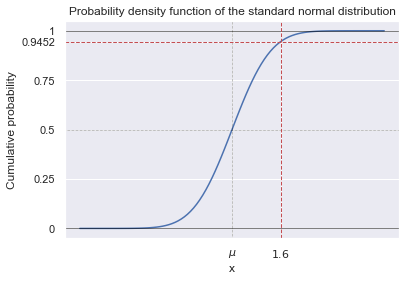

In [5]:
#define plotting values
x = np.linspace(-5, 5, 100)
y = norm_cdf(x)

#could also use norm.cdf(x) from scipy.stats

#calculate proportion of plants with heights < 88 cm (z = 1.6)
prop = norm_cdf(1.6)

#draw plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Cumulative probability")
ax.set_xlabel("x")

#set x ticks and labels for useful values and draw vertical lines
ax.set_xticks([0, 1.6])
ax.set_xticklabels(["$\mu$", "$1.6$"])
ax.axhline(y=0, color="black", lw=.5)
ax.axhline(y=1, color="black", lw=.5)
ax.axvline(x=0, color="black", lw=.5, ls=":")

#set y ticks and labels, including a special label for Phi(1.6)
ax.set_yticks([0, 0.25, 0.5, 0.75, 0.9452, 1])
ax.set_yticklabels(["0", "0.25", "0.5", "0.75", "0.9452", "1"])
ax.axhline(y=0.5, color="black", lw=.5, ls=":")
ax.axhline(y=0.9452, color="C3", lw=1, ls="--")
ax.axvline(x=1.6, color="C3", lw=1, ls="--")

ax.set_title("Probability density function of the standard normal distribution")
plt.show()

You can also calculate the proportion of plants with heights between two values by subtracting z for the lowest value from z with the highest value. For example, what is the proportion P of plants with heights between 70 and 90 cm ? 
$$P = \Phi(\frac{90-80}{5}) - \Phi(\frac{70-80}{5}) = 0.9545$$

In [6]:
#proportion of plants with heights between 70 and 90 cm
P = norm_cdf((90 - 80) / 5) - norm_cdf((70 - 80) / 5)
print("The proportion of plants with heights between 70 and 90 cm is {:.2f} %".format(P * 100))

The proportion of plants with heights between 70 and 90 cm is 95.45 %


## Verifying a sample follows the normal distribution
For many statistical procedures, the data have to follow a normal distribution. In practice, no natural distribution is exactly normal but it has to deviate a lot from the normal distribution to invalidate analyses based on the asumption that the data are normally distributed.

To verify data are approximately normally distributed, one can plot a **histogram** of the data.

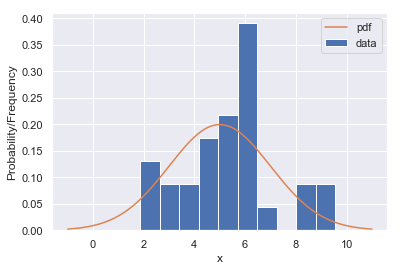

In [7]:
#define a mean and a standard deviation then generate normally distributed data
mu = 5
sigma = 2
data = [np.random.randn() * sigma + mu for _ in range(30)]

#generate values for the probability density function
x = np.linspace(-1, 11, 200)
y = norm_pdf(x, mu=mu, sigma=sigma)

#plot a histogram of the data and the theoretical normal curve
fig, ax = plt.subplots()
ax.hist(data, density=True, label="data")
ax.plot(x, y, label="pdf")
ax.set_xlabel("x")
ax.set_ylabel("Probability/Frequency")
ax.legend()
plt.show()

Another way to check if data are normally distributed is to plot **sample quantiles of the data *versus* theoretical quantiles**. This type of plot is often called a **Q-Q plot**. In this plot, if the data are close to the straight line, they are considered normally distributed.

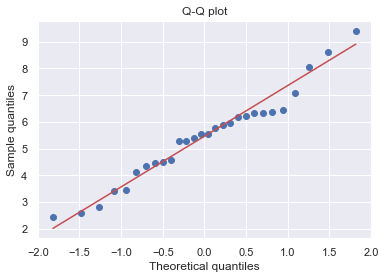

In [8]:
#first we need a inverse cdf function, the percent point function
def norm_ppf(p):
    """Calculates the percent point function of the normal distribution."""
    return sqrt(2) * erfinv(2 * p - 1)

#could also use norm.ppf(x) from scipy.stats

#function for the Q-Q plot
def qq_norm(data):
    """Return theoretical quantiles for a sample x."""
    data = np.sort(data)
    n = np.linspace(0, 1, len(data))
    theo_quant = norm_ppf(n)
    
    #x and y values for the theoretical values line
    x = np.array([theo_quant[1], theo_quant[-2]])
    y = np.mean(data) + np.std(data) * x
    
    #plot figure
    fig, ax = plt.subplots()
    ax.scatter(theo_quant, data)
    ax.plot(x, y, color="C3")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Sample quantiles")
    ax.set_title("Q-Q plot")
    plt.show()

qq_norm(data)

#probplot from scipy.stats does the same thing
#qqplot = probplot(data, plot=plt)

Finally, one can test normality of a sample by using the Shapiro-Wilk test. The null hypothesis is that the sample is normally distributed.

In [9]:
W, p = shapiro(data)
if p <= 0.05:
    print("We can reject normality of the sample (W = {0:.4f}, p-value = {1:.4f}).".format(W, p))
else:
    print("We cannot reject normality of the sample (W = {0:.4f}, p-value = {1:.4f}).".format(W, p))

We cannot reject normality of the sample (W = 0.9672, p-value = 0.4652).


## Estimation of the population mean $\mu$
If we repeatedly take a sample from a population and calculate the mean of some feature, we will obtain different values each time and it there will be no way of telling which mean is closest to the population mean $\mu$. However, we can give a **confidence interval**, a range within which there is a probability to fin $\mu$.

We study a population with a mean $\mu$ and a variance $\sigma^2$. If a large number of samples (each of $n$ individuals) is taken from the population and the sample mean $\bar{x}$ is calculated, the values of $\bar{x}$ are normally distributed with a mean of $\mu$ and a variance of $\frac {\sigma^2} {n}$. This is true even if the population is not normally distributed, according to the **central limit theorem**. The corresponding standard deviation $\sqrt{\frac {\sigma^2}{n}}$ is called the **standard error of the mean**.

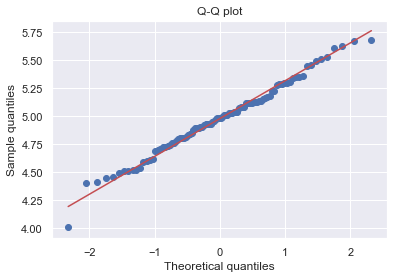

In [10]:
#verifying that the mean of samples taken from a population are normally distributed
mu = [np.mean([np.random.randn()+5 for _ in range(10)]) for __ in range(100)]
qq_norm(mu)

To determine a **confidence interval**, we choose a proportion of the population we would like to have between the confidence interval boundaries, for example 95 %. You remember that for the normal distribution 95 % of the population lies within 1.96 standard deviations from the mean. However, we do not know the standard deviation of the population but just estimate it by calculating the **sample standard deviation** $s$, so there is extra uncertainty about the value of $\mu$. This means the confidence interval is wider and 1.96 has to be increased by an amount which depends on the sample size $n$. The number to replace 1.96 is found in tables of the **t-distribution** with $n - 1$ degrees of freedom. The *t*-distribution is similar to the normal distribution but more spread out.

For a sample size of 10, a 95 % confidence interval for $\mu$ is given by $\bar{x} \pm 2.262 \frac{s}{\sqrt{n}}$.

In [11]:
#determine by how much to multiply standard deviation to find 95 % confidence interval
#sample size n = 10 so degrees of freedom = 9
#95 % means 2.5 % on each tail
print("{:.3f}".format(t.ppf(0.975, df=9)))

2.262


## Determination of sample size
To estimate the mean $\mu$ of a population feature with a 95 % confidence interval we need to know the standard deviation of the population and have a large enough sample. Since the confidence interval is given by $\bar{x} \pm 2.262 \frac{s}{\sqrt{n}}$, estimating $\mu$ to within $\delta$ requires a sample size of at least $(\frac{2.262 \sigma}{\delta}) ^2$ individuals. For example, if we want to know the mean grain yield per plant within 0.5 g with 95 % confidence while standard deviation equals 2, we need a population of at least $(2.262 \times 2 / 0.5) ^2 = 81.87$ so $82$ individuals.

In [10]:
size = ceil((2.262 * 2 / 0.5) ** 2)
print("Mean grain yield per plant within 0.5 g with 95 % confidence while standard deviation equals 2 : {}".format(size))

Mean grain yield per plant within 0.5 g with 95 % confidence while standard deviation equals 2 : 82
